In [4]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import os
import glob
import matti_func as matti

conv_pc_UA = 206264.8062471 
m_unit = 1322.412172 #to have M_sol

v_unit = 2.38041454521845 #to have km/s
t_unit = 0.411046867566472 #to have Megayear
t_unit *= 1e6 #to have year

R_cl = 0.00580673245713115 * conv_pc_UA
print("R_cl esempio = %f"%R_cl)

n=2
fs = 'xx-large'
fs_small = 'large'
col = ['blue', 'red', 'green', 'orange', 'purple', 'dimgrey', 'navy', 'crimson']
col1 = ['deepskyblue', 'salmon', 'lime', 'gold', 'magenta','silver', 'cyan', 'pink']
cole = ['#e6194b','#3cb44b','#ffe119','#0082c8','#f58231','#911eb4','#46f0f0','#f032e6','#d2f53c','#fabebe','#008080','#e6beff','#aa6e28','#fffac8','#800000','#aaffc3','#808000','#ffd8b1','#000080','#808080','#ffffff','#000000']

col = col + col1 #to extend a list

true = True
false = False

# T_GW = matti.comp_t_gw_in_Gyr(0.1, 10, 10)
# print("T_gw = %e   (dovrebbe essese ~1.3e+1) ok ora funge"%T_GW)

direc = '/home/matti/programming/isteddas/cmake-build-debug/bin/output/'
arr = os.listdir(direc)
for i in arr:
    if(i[0:3]=='arc'): 
        print(i)

        
'''controllo cambio unita isteddas <--> tzunami'''
# com=np.array((0.030476068014076,  -0.242650473932945,  0.406752474545063))
# #m,x,y,z,vx,vy,vz
# tr = [[4.712234077117456454e-01, -1.789243367495202630e+00, -1.196389797594871318e+01, 3.582289575609655330e+00, 4.963823001776352523e-02, -1.884035399647597253e-01, -4.540261575696664664e-01],
# [2.797439667004745778e-01, -2.015064067415357929e+00, -1.158151700853190036e+01, 3.427192818342689407e+00, -6.482647978706289338e-02, 3.549425565322608667e-01, 7.408430079055652318e-01],
# [1.905306548366714758e-01, 7.383774403321472946e+00, 4.659370057657135789e+01, -1.389170271392033484e+01, -2.758547858555557286e-02, -5.517684593591470205e-02, 3.517224791033741332e-02]]
# tr = np.array(tr)
# tr[:,0] /= m_unit #QUESTO OK
# tr[:,1:4] /= conv_pc_UA #QUESTO OK
# tr[:,1:4] += com #QUESTO OK
# tr[:,4:7] *= 149597828.67727545 * 2 * np.pi / 31557600 #cosi passo da 2pi*AU/yr a km/s
# tr[:,4:7] /= v_unit
# print(tr)
# print(6.311059631768861644e-01/3.582289575609655330e+00)
# print(3.582289575609655330e+00/6.311059631768861644e-01)
        
def right_label(X):
    if(X==0): return 'X [au]'
    elif(X==1): return 'Y [au]'
    else: return 'Z [au]'

R_cl esempio = 1197.724545
arc_1008ioioiooioioioi.dat
arc_1008ioioio.dat
arc_1008.dat
arc_1008io.dat
arc_1008ioioi.dat
arc_1008ioioiooioioioioioioo.dat
arc_1008ioioiooioioioioio.dat
arc_1008ioioiooioi.dat
arc_1008ioioiooioioioioioiooio.dat
arc_1008ioioiooio.dat
arc_1008ioioiooioioioioi.dat
arc_1008ioioiooioioioioioiooi.dat
arc_1008ioioiooioio.dat
arc_1008ioioiooi.dat
arc_1008ioioiooioioioio.dat
arc_1008ioio.dat
arc_1008ioi.dat
arc_1008ioioioo.dat
arc_1008ioioiooioioi.dat
arc_1008ioioiooioioioioioio.dat
arc_1008ioioiooioioio.dat
arc_1008ioioiooioioioioioi.dat
arc_1008i.dat


# REGULARIZATION OUTPUT

In [2]:
o=[]; o1=[]; o2=[]; o3=[]; o4=[]; o5=[];
N=0; N1=0; N2=0; N3=0; N4=0; N5=0; N6=0; N7=0; Ns=0
name=''; name1=''; name2=''; name3=''; name4=''; name5=''; name6=''; name7=''; names=''
stop_check = true

direc = '/home/matti/programming/isteddas/cmake-build-debug/bin/output/'
# direc1 = '/home/matti/Documents/data/close_enc_4body_rotto/'
# direc = '/home/matti/Documents/data/diCarlo_fractal_cluster/N2e5_b0_D1.6_rh3_prove/'
name = 'arc_1008.dat'
name1 = 'arc_1008i.dat'
# name2 = 'arc_0io.dat'
# name1 = 'arc_2.dat'
# name2 = 'arc_8.dat'
# name3 = 'arc_10.dat'
# name1 = 'arc_12.dat'
# name2 = 'arc_14.dat'
# name3 = 'arc_26.dat'
# name4 = 'arc_30.dat'
# name5 = 'arc_32.dat'
# name6 = 'arc_36.dat'
# name7 = 'arc_38.dat'
# name = 'arc_107777.dat'
# name1 = 'arc_23466.dat'
# names = 'specstars.dat'
# namesv = 'specstars_562.dat'
if (name!=''): o, stop, m, idx, N = matti.open_reg(direc, name, 10, stop_check)
if (name1!=''): o1, stop1, m1, idx1, N1 = matti.open_reg(direc, name1, 10, stop_check)
if (name2!=''): o2, stop2, m2, idx2, N2 = matti.open_reg(direc, name2, 10, stop_check)
if (name3!=''): o3, stop3, m3, idx3, N3 = matti.open_reg(direc, name3, 10, stop_check)
if (name4!=''): o4, stop4, m4, idx4, N4 = matti.open_reg(direc, name4, 10, stop_check)
if (name5!=''): o5, stop5, m5, idx5, N5 = matti.open_reg(direc, name5, 10, stop_check)
if (name6!=''): o6, stop6, m6, idx6, N6 = matti.open_reg(direc, name6, 10, stop_check)
if (name7!=''): o7, stop7, m7, idx7, N7 = matti.open_reg(direc, name7, 10, stop_check)
if (names!=''): os, stops, ms, idxs, Ns = matti.open_reg(direc, names, 1, false) #qui difficilmente ti servira' piu' d 1
# osv, stopsv, msv, idxsv, Nsv = matti.open_reg(direc1, namesv, 1)

off = N*3
off1 = N1*3
off2 = N2*3
off3 = N3*3
off4 = N4*3
off5 = N5*3
# a1, T1, e1, inc1, ome1, Ome1, nu1 = matti.cart_to_kepl(m[0],o[:,0:3], o[:,off:off+3], m[1], o[:,3:6], o[:,off+3:off+6])
# af, Tf, ef, incf, omef, Omef, nuf = matti.cart_to_kepl(m5[0],o5[:,0:3], o5[:,off5:off5+3], m5[1], o5[:,3:6], o5[:,off5+3:off5+6])
# a, T, e, inc, ome, Ome, nu = matti.cart_to_kepl(m2[0],o2[:,0:3], o2[:,off2:off2+3], m2[1], o2[:,3:6], o2[:,off2+3:off2+6])
# if(N==3): #hierarchical triple
#     cm_bin = (o[:,0:3]*m[0]+o[:,3:6]*m[1])/(m[0]+m[1])
#     cv_bin = (o[:,off:off+3]*m[0]+o[:,off+3:off+6]*m[1])/(m[0]+m[1])
#     a2, T2, e2, inc2, ome2, Ome2, nu2 = matti.cart_to_kepl(m[0]+m[1], cm_bin, cv_bin, m[2], o[:,6:9], o[:,off+6:off+9])
#     i_mut = np.arccos( np.cos(inc1)*np.cos(inc2) + np.cos(Ome1-Ome2)*np.sin(inc1)*np.sin(inc2) ) * 180.0 / np.pi
#     dist_mut = ((o[:,6] - cm_bin[:,0])**2 + (o[:,7] - cm_bin[:,1])**2 + (o[:,8] - cm_bin[:,2])**2 )**0.5
#     dist_mut *= conv_pc_UA
#     matti.kepl_units(a2,T2,inc2,ome2,Ome2,nu2,t_unit,conv_pc_UA)

if (N>0): matti.change_units(o,m,m_unit,t_unit,v_unit,conv_pc_UA)
if (N1>0): matti.change_units(o1,m1,m_unit,t_unit,v_unit,conv_pc_UA)
if (N2>0): matti.change_units(o2,m2,m_unit,t_unit,v_unit,conv_pc_UA)
if (N3>0): matti.change_units(o3,m3,m_unit,t_unit,v_unit,conv_pc_UA)
if (N4>0): matti.change_units(o4,m4,m_unit,t_unit,v_unit,conv_pc_UA)
if (N5>0): matti.change_units(o5,m5,m_unit,t_unit,v_unit,conv_pc_UA)
if (N6>0): matti.change_units(o6,m6,m_unit,t_unit,v_unit,conv_pc_UA)
if (N7>0): matti.change_units(o7,m7,m_unit,t_unit,v_unit,conv_pc_UA)
if (Ns>0): matti.change_units(os,ms,m_unit,t_unit,v_unit,conv_pc_UA)
# matti.change_units(osv,msv,m_unit,t_unit,v_unit,conv_pc_UA)

# matti.kepl_units(a,T,inc,ome,Ome,nu,t_unit,conv_pc_UA)
# matti.kepl_units(a1,T1,inc1,ome1,Ome1,nu1,t_unit,conv_pc_UA)
# matti.kepl_units(af,Tf,incf,omef,Omef,nuf,t_unit,conv_pc_UA)

# T_GW_i = matti.comp_t_gw_in_Gyr(a1[0], m[0], m[1])
# T_GW_f = matti.comp_t_gw_in_Gyr(a1[-1], m[0], m[1])
# print("a1[0] = %e;     a2[-1] = %e"%(a1[0],a1[-1]))
# print("T_gw_i = %e;     T_gw_f = %e"%(T_GW_i,T_GW_f))


# o_com = (o[:,0:3]*m[0]+o[:,3:6]*m[1])/(m[0]+m[1])
# o_comV = (o[:,6:9]*m[0]+o[:,9:12]*m[1])/(m[0]+m[1])
# osv_com = (osv[:,0:3]*msv[0]+osv[:,3:6]*msv[1])/(msv[0]+msv[1])
# o1_comV = (o1[:,6:9]*m[0]+o1[:,9:12]*m[1])/(m[0]+m[1])
# print((o1_comV[0,:] - o1_comV[-1,:])/o1_comV[0,:])

# direc1 = '/home/matti/programming/figures_py/'
# name1 = 'arc_provagamma1.dat'
# o1, stop1, m1 = open_reg(direc1, name1))

 >>> reading file /home/matti/programming/isteddas/cmake-build-debug/bin/output/arc_1008.dat
[1008, 1679]
[0.0462805660811, 0.00325670237662]
(2, 14)
number of stops: 1
 >>> reading file /home/matti/programming/isteddas/cmake-build-debug/bin/output/arc_1008i.dat
[1008, 1679, 899, 1769, 1157]
[0.0462805660811, 0.00325670237662, 0.000122063442936, 0.000108051867718, 9.94098156955e-05]
(353, 32)
number of stops: 237
units: M_sol, year, km/s, UA
units: M_sol, year, km/s, UA


In [ ]:
%matplotlib widget

threeD = false;
x=0 ; y=1 ; z=2 ; v=3*N
a=0 ; b=o.shape[0] ; j=1

fine = 40
oplot = o2
Np = N2
mp = m2

''' choose the axis to be visualize, for 2D '''
X = x ; Y = z;

fig = plt.figure(0, figsize=[n*4.8,n*4.8])

# plt.axes().set_facecolor("gainsboro")
# fig.patch.set_facecolor("gainsboro")
    
if threeD:
    ax = fig.add_subplot(projection='3d')

for i in range(Np):
    if not threeD:
#         _ = plt.quiver(con[:,i*3+X],con[:,i*3+Y],con[:,i*3+X+v],con[:,i*3+Y+v], width=0.001,color='black', zorder=i)
#         _ = plt.plot(con[:,i*3+X],con[:,i*3+Y],color='black', zorder=i)
#         _ = plt.quiver(o[a:b:j,i*3+X],o[a:b:j,i*3+Y],o[a:b:j,i*3+X+v],o[a:b:j,i*3+Y+v], width=0.001, color=col[i], zorder=i)
        _ = plt.scatter(oplot[a:b:j,i*3+X],oplot[a:b:j,i*3+Y], s=0.8, color=col[i], label=r'%1.2f M$_\odot$'%mp[i], zorder=i)
#         _ = plt.plot(oplot[a:b:j,i*3+X],oplot[a:b:j,i*3+Y], linewidth=0.1, color=col[i])
#         _ = plt.scatter(os[:,i*3+X],os[:,i*3+Y], s=2, color=col1[i], label=r'%1.2f M$_\odot$'%m[i], zorder=-2)
#         _ = plt.scatter(o[stop,i*3+X],o[stop,i*3+Y], s=1,color='black', label='stops', zorder=5)
#         _ = plt.plot(osv[:,i*3+X],osv[:,i*3+Y], lw=1, color='green', linestyle='--',zorder=-1)
        _ = plt.scatter(oplot[0,i*3+X],oplot[0,i*3+Y], s=15, color='purple', marker='*', zorder=10)
#         _ = plt.scatter(os[0,i*3+X],os[0,i*3+Y], s=15, color='purple', marker='*', zorder=10)
#         _ = plt.scatter(o[-1,i*3+X],o[-1,i*3+Y], lw=2, color='purple', marker='*', zorder=10)
    else:
#         _ = ax.quiver(o[a:b,i*3],o[a:b:j,i*3+y],o[a:b:j,i*3+z],o[a:b:j,i*3+v],o[a:b:j,i*3+y+v],o[a:b:j,i*3+z+v], color=col[i], length=10, zorder=i, label=r'%1.2f M$_\odot$'%m[i])
#         _ = ax.quiver(con[:,i*3],con[:,i*3+y],con[:,i*3+z],con[:,i*3+v],con[:,i*3+y+v],con[:,i*3+z+v], color='black', length=10, zorder=i)
#         _ = ax.plot(con[:,i*3],con[:,i*3+y],con[:,i*3+z], color='black', zorder=i)
#         _ = ax.scatter(pert[:,x],pert[:,y],pert[:,z], color='green', zorder=i)
        _ = ax.plot(o[a:b:j,i*3],o[a:b:j,i*3+y],o[a:b:j,i*3+z], lw=1, color=col[i], marker='*', label=r'%1.2f M$_\odot$'%m[i])   
#     _ = plt.plot(o1[a:b:j,i*3+x],o1[a:b:j,i*3+z], lw=1, color=col[i], label=r'%1.2f M$_\odot$'%m[i], zorder=i)

# _ = plt.plot(osv_com[:,X],osv_com[:,Y], lw=1, color='magenta', linestyle='--', label='com isteddas', zorder=0)
# _ = plt.plot(o_com[:,X],o_com[:,Y], lw=1, color='darkred',  label='com ARChain', zorder=0)

# for i in range(Ns):
#     if not threeD:
#         _ = plt.scatter(os[:,i*3+X],os[:,i*3+Y], s=4, color=cole[i], label=r'%d: %1.2f M$_\odot$'%(idxs[i],ms[i]), zorder=i)
#         _ = plt.scatter(os[0,i*3+X],os[0,i*3+Y], s=15, color='purple', marker='*', zorder=10)
    
if not threeD:
#     _ = plt.scatter(0, 0, color='black', marker='h', lw=3, label='COM', zorder=10)
#     _ = plt.scatter(com[0,X], com[0,Y], color='black', marker='h', lw=3, label='COM', zorder=10)
    _ = plt.xlabel(right_label(X), fontsize=fs)
    _ = plt.ylabel(right_label(Y), fontsize=fs)
else:
#     _ = ax.scatter(0, 0, 0, color='black', marker='h', lw=3, label='COM', zorder=10)
#     _ = ax.scatter(com[0,x], com[0,y], com[0,z], color='black', marker='h', lw=3, label='COM', zorder=10)
    _ = ax.set_xlabel('X [au]', fontsize=fs)
    _ = ax.set_ylabel('Y [au]', fontsize=fs)
    _ = ax.set_zlabel('Z [au]', fontsize=fs)
_ = plt.title('t = %1.1f years'%o[b-1,N*6],fontsize=fs)
_ = plt.legend(fontsize=fs)

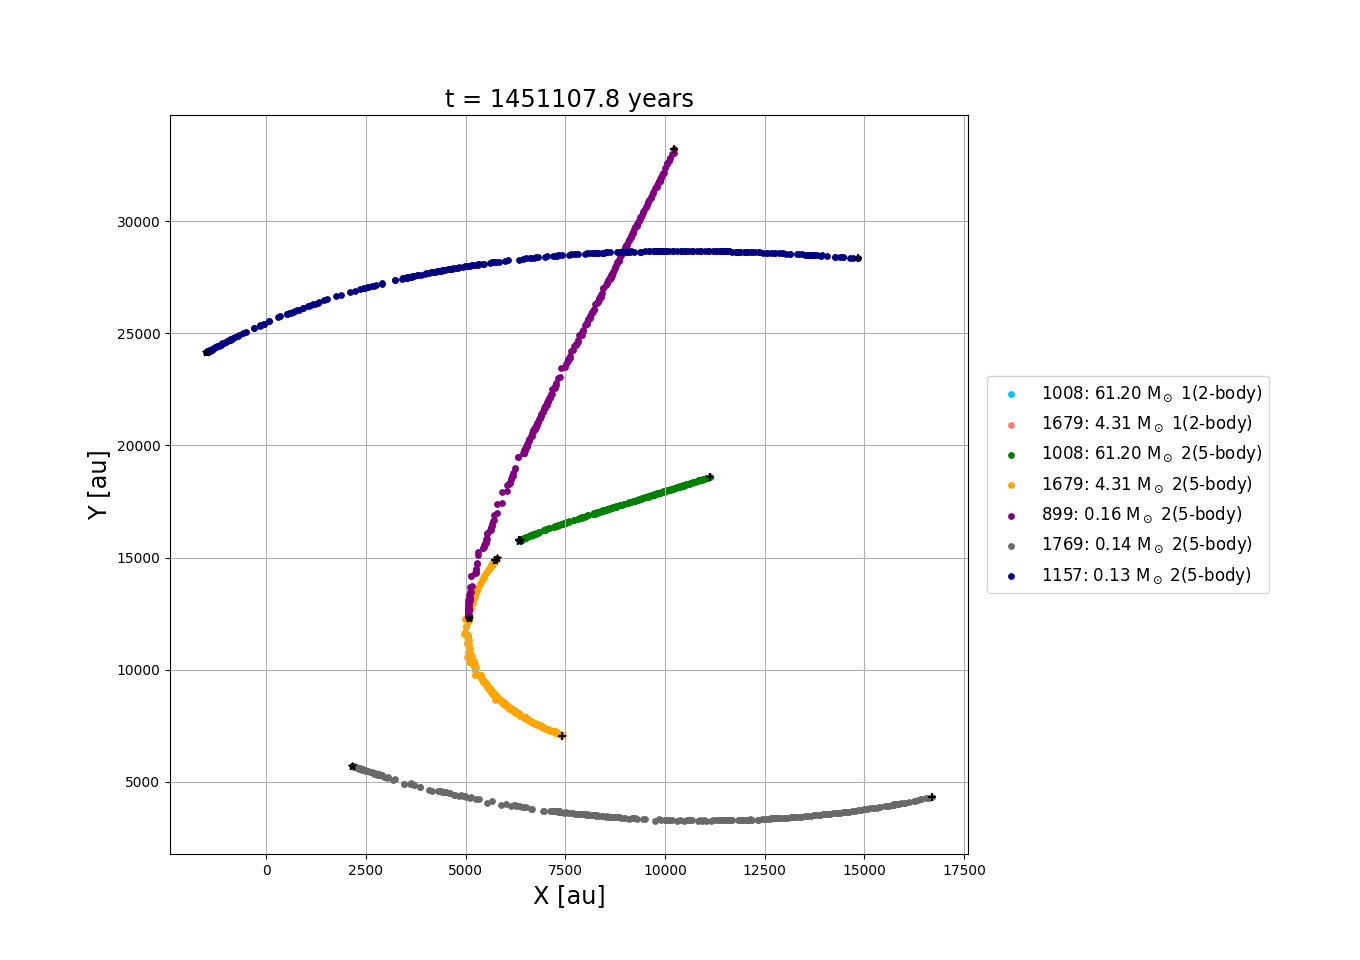

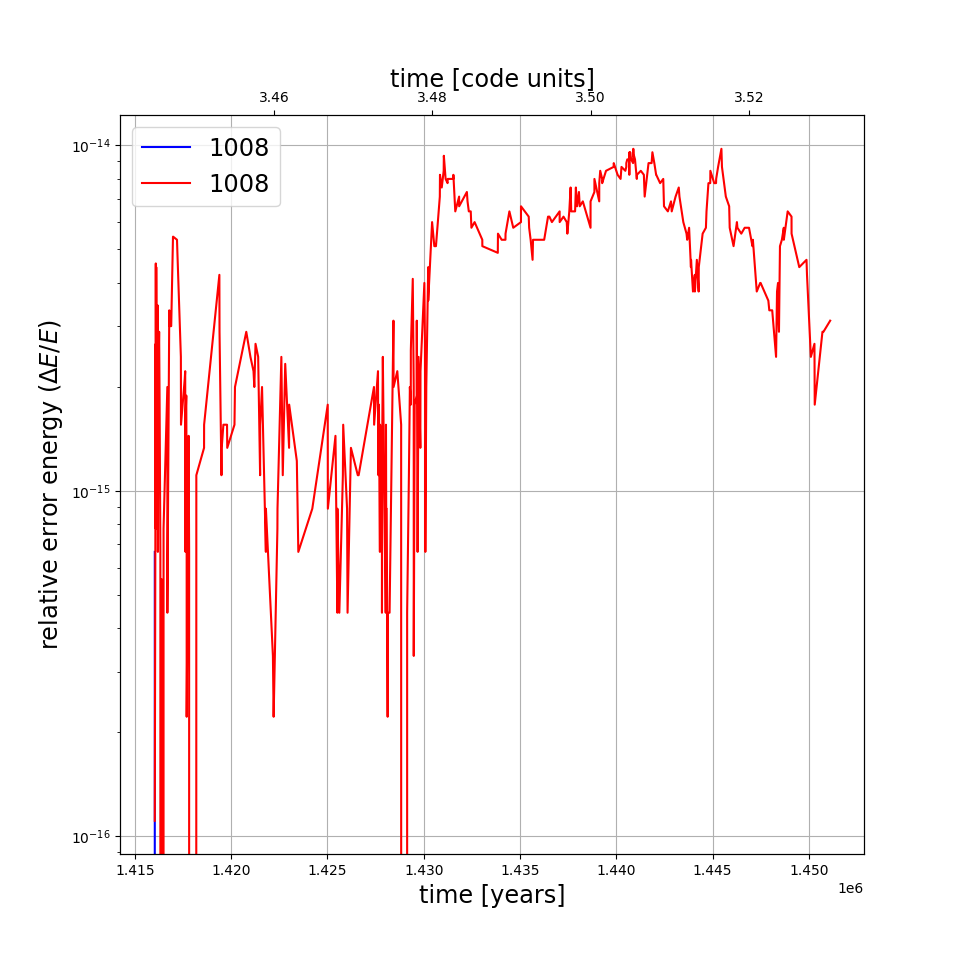

In [3]:
%matplotlib widget
    
x=0 ; y=1 ; z=2 ;# v=3*N

# X = x ; Y = y

def plottini(X,Y,ii,n=n):
    iii = 1
    fig = plt.figure(ii, figsize=[n*6.8,n*4.8])
#     ax = fig.add_subplot();
    gs = fig.add_gridspec(1, 2, width_ratios=[1,0.2])
    ax = fig.add_subplot(gs[0,0])
#     axlab = fig.add_subplot(gs[0,1])

    for i in range(N):
        _ = ax.scatter(o[:,i*3+X],o[:,i*3+Y], s=15, color=col1[i], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx[i],m[i],iii,N), zorder=i)
        _ = ax.scatter(o[0,i*3+X],o[0,i*3+Y], s=30, color='black', marker='*', zorder=1000)
        _ = ax.scatter(o[-1,i*3+X],o[-1,i*3+Y], s=30, color='black', marker='+', zorder=1000)
#         _ = ax.scatter(o[stop,i*3+X],o[stop,i*3+Y], s=45, color='red', marker='D', zorder=-1001)
        _ = ax.set_title('t = %1.1f years'%o[-1,N*6],fontsize=fs)
    iii += 1 ; ex=N
    for i in range(N1):
        _ = ax.scatter(o1[:,i*3+X],o1[:,i*3+Y], s=15, color=col[i+ex], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx1[i],m1[i],iii,N1), zorder=i)
#         _ = ax.plot(o1[:,i*3+X],o1[:,i*3+Y], color=col[i+N], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx1[i],m1[i],iii,N1), zorder=i)
        _ = ax.scatter(o1[0,i*3+X],o1[0,i*3+Y], s=30, color='black', marker='*', zorder=1000)
        _ = ax.scatter(o1[-1,i*3+X],o1[-1,i*3+Y], s=30, color='black', marker='+', zorder=1000)
        _ = ax.set_title('t = %1.1f years'%o1[-1,N1*6],fontsize=fs)
    iii += 1 ; ex+=N1
    for i in range(N2):
        _ = ax.scatter(o2[:,i*3+X],o2[:,i*3+Y], s=15, color=col[i+N+N1], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx2[i],m2[i],iii,N2), zorder=i)
#         _ = ax.plot(o2[:,i*3+X],o2[:,i*3+Y], color=col[i+N+N1], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx2[i],m2[i],iii,N2), zorder=i)
        _ = ax.scatter(o2[0,i*3+X],o2[0,i*3+Y], s=30, color='black', marker='*', zorder=1000)
        _ = ax.scatter(o2[-1,i*3+X],o2[-1,i*3+Y], s=30, color='black', marker='+', zorder=1000)
#         _ = ax.scatter(o2[stop2,i*3+X],o2[stop2,i*3+Y], s=45, color='red', marker='D', zorder=-1001)
        _ = ax.set_title('t = %1.1f years'%o2[-1,N2*6],fontsize=fs)
    iii += 1 ; ex+=N2
    for i in range(N3):
        _ = ax.scatter(o3[:,i*3+X],o3[:,i*3+Y], s=15, color=col[i+ex], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx3[i],m3[i],iii,N3), zorder=i)
        _ = ax.scatter(o3[0,i*3+X],o3[0,i*3+Y], s=30, color='black', marker='*', zorder=1000)
        _ = ax.scatter(o3[-1,i*3+X],o3[-1,i*3+Y], s=30, color='black', marker='+', zorder=1000)
        _ = ax.set_title('t = %1.1f years'%o3[-1,N3*6],fontsize=fs)
    iii += 1 ; ex+=N3
    for i in range(N4):
        _ = ax.scatter(o4[:,i*3+X],o4[:,i*3+Y], s=15, color=col[i+ex], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx4[i],m4[i],iii,N4), zorder=i)
        _ = ax.scatter(o4[0,i*3+X],o4[0,i*3+Y], s=30, color='black', marker='*', zorder=1000)
        _ = ax.scatter(o4[-1,i*3+X],o4[-1,i*3+Y], s=30, color='black', marker='+', zorder=1000)
        _ = ax.set_title('t = %1.1f years'%o4[-1,N4*6],fontsize=fs)
    iii += 1 ; ex+=N4
    for i in range(N5):
        _ = ax.scatter(o5[:,i*3+X],o5[:,i*3+Y], s=15, color=col[i+ex], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx5[i],m5[i],iii,N5), zorder=i)
        _ = ax.scatter(o5[0,i*3+X],o5[0,i*3+Y], s=30, color='black', marker='*', zorder=1000)
        _ = ax.scatter(o5[-1,i*3+X],o5[-1,i*3+Y], s=30, color='black', marker='+', zorder=1000)
        _ = ax.set_title('t = %1.1f years'%o5[-1,N5*6],fontsize=fs)
    iii += 1 ; ex+=N5
    for i in range(N6):
        _ = ax.scatter(o6[:,i*3+X],o6[:,i*3+Y], s=15, color=col[i+ex], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx6[i],m6[i],iii,N6), zorder=i)
        _ = ax.scatter(o6[0,i*3+X],o6[0,i*3+Y], s=30, color='black', marker='*', zorder=1000)
        _ = ax.scatter(o6[-1,i*3+X],o6[-1,i*3+Y], s=30, color='black', marker='+', zorder=1000)
        _ = ax.set_title('t = %1.1f years'%o6[-1,N6*6],fontsize=fs)
    iii += 1; ex+=N6
    for i in range(N7):
        _ = ax.scatter(o7[:,i*3+X],o7[:,i*3+Y], s=15, color=col[i+ex], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx7[i],m7[i],iii,N7), zorder=i)
        _ = ax.scatter(o7[0,i*3+X],o7[0,i*3+Y], s=30, color='black', marker='*', zorder=1000)
        _ = ax.scatter(o7[-1,i*3+X],o7[-1,i*3+Y], s=30, color='black', marker='+', zorder=1000)
        _ = ax.set_title('t = %1.1f years'%o7[-1,N7*6],fontsize=fs)

    # N_ist = max(N,N1,N2)

    for i in range(Ns):
    #     if(i<N_ist): lab = r'%1.2f M$_\odot$ (Ist)'%ms[i]
    #     else: lab = r'%1.2f M$_\odot$ (Pert)'%ms[i]
        lab = r'%d: %1.2f M$_\odot$'%(idxs[i],ms[i])
    #     _ = plt.scatter(os[:,i*3+X],os[:,i*3+Y], s=10, color=col1[i],label=lab, zorder=12)
    #     _ = plt.scatter(os[0,i*3+X],os[0,i*3+Y], s=30, color="black",marker='*', zorder=132)
        _ = ax.scatter(os[:,i*3+X],os[:,i*3+Y], s=10,label=lab, zorder=-222)
        _ = ax.scatter(os[-1,i*3+X],os[-1,i*3+Y],  s=30,marker='x', color='black', zorder=-233)
        _ = ax.scatter(os[0,i*3+X],os[0,i*3+Y], s=30, marker='*', color='black', zorder=-223)
    # _ = plt.scatter(os[:,(Ns-1)*3+X],os[:,(Ns-1)*3+Y], s=30,marker='*',label=lab, zorder=-12)

    # for i in range(Nsv):
    #     _ = plt.scatter(osv[:,i*3+X],osv[:,i*3+Y], s=5, label=r'%d: %1.2f M$_\odot$ NOREG'%(idxs[i],ms[i]), zorder=13)
    #     _ = plt.scatter(osv[0,i*3+X],osv[0,i*3+Y], s=15, color="black",marker='*', zorder=133)

    _ = ax.set_xlabel(right_label(X), fontsize=fs)
    _ = ax.set_ylabel(right_label(Y), fontsize=fs)
    _ = ax.grid()
    _ = ax.legend(fontsize=fs_small, loc='center', bbox_to_anchor=(1.2, 0.5))
#     label_params = ax.get_legend_handles_labels() 
#     figlegend = plt.figure(666)
#     axlab.legend(*label_params,  fontsize=fs_small, loc='center')
    
def plot_errore():
    fig  = plt.figure(9999, figsize=[n*4.8,n*4.8])
    ax   = fig.add_subplot()
    plot = ax.semilogy
    ax2  = ax.twiny()
    # _ = plt.semilogy(o[i:f,6],o[i:f,7], color='blue')
    # _ = plot(oplot[:,N*6],oplot[:,N*6+1], color='blue', label='%d'%iii) ; iii += 1
    if (N>0): _ = plot(o[:,N*6],o[:,N*6+1], color='blue', label='%d'%idx[0])
    if (N1>0):_ = plot(o1[:,N1*6],o1[:,N1*6+1], color='red', label='%d'%idx1[0])
    if (N2>0):_ = plot(o2[:,N2*6],o2[:,N2*6+1], color='green',label='%d'%idx2[0])
    if (N3>0):_ = plot(o3[:,N3*6],o3[:,N3*6+1], color='orange', label='%d'%idx3[0])
    if (N4>0):_ = plot(o4[:,N4*6],o4[:,N4*6+1], color='magenta', label='%d'%idx4[0])
    if (N5>0):_ = plot(o5[:,N5*6],o5[:,N5*6+1], color='black', label='%d'%idx5[0])
    if (N6>0):_ = plot(o6[:,N6*6],o6[:,N6*6+1], color='yellow', label='%d'%idx6[0])
    if (N7>0):_ = plot(o7[:,N7*6],o7[:,N7*6+1], color='pink', label='%d'%idx7[0])
    # _ = plt.semilogy(o1[i:f,9],o1[i:f,10], color='red', label=r'$\alpha\beta\gamma=0,0,1$')
    if(False):
        if (N>0 and len(stop)>0):_ = ax.vlines(o[stop,N*6], np.min(o[:,N*6+1]), np.max(o[:,N*6+1]), linestyle='--', color='blue') 
        if (N1>0 and len(stop1)>0):_ = ax.vlines(o1[stop1,N1*6], np.min(o1[:,N1*6+1]), np.max(o1[:,N1*6+1]), linestyle='-.', color='red') 
        if (N2>0 and len(stop2)>0):_ = ax.vlines(o2[stop2,N2*6], np.min(o2[:,N2*6+1]), np.max(o2[:,N2*6+1]), linestyle=':', color='green') 
        if (N3>0 and len(stop3)>0):_ = ax.vlines(o3[stop3,N3*6], np.min(o3[:,N3*6+1]), np.max(o3[:,N3*6+1]), linestyle='--', color='orange') 
        if (N4>0 and len(stop4)>0):_ = ax.vlines(o4[stop4,N4*6], np.min(o4[:,N4*6+1]), np.max(o4[:,N4*6+1]), linestyle='-.', color='magenta') 
        if (N5>0 and len(stop5)>0):_ = ax.vlines(o5[stop5,N5*6], np.min(o5[:,N5*6+1]), np.max(o5[:,N5*6+1]), linestyle=':', color='black') 
        if (N6>0 and len(stop6)>0):_ = ax.vlines(o6[stop6,N6*6], np.min(o6[:,N6*6+1]), np.max(o6[:,N6*6+1]), linestyle='--', color='yellow') 
        if (N7>0 and len(stop7)>0):_ = ax.vlines(o7[stop7,N7*6], np.min(o7[:,N7*6+1]), np.max(o7[:,N7*6+1]), linestyle='-.', color='pink') 
    # _ = ax.set_xticks(fontsize=fs)
    # _ = ax.set_yticks(fontsize=fs)
    _ = ax.set_xlabel('time [years]', fontsize=fs)
    _ = ax.set_ylabel(r'relative error energy $(\Delta E/E)$', fontsize=fs)
    _ = ax.legend(fontsize=fs)
    _ = ax.grid()
    _ = ax2.set_xlim((ax.get_xlim()[0]/t_unit, ax.get_xlim()[1]/t_unit))
    _ = ax2.set_xlabel("time [code units]", fontsize=fs)
    
plottini(x,y,0)
# plottini(x,z,1)
# plottini(y,z,2)
plot_errore()

In [5]:
%matplotlib widget
    
x=0 ; y=1 ; z=2 ; v=3*N
X = x ; Y = y ; Z = z

iii = 1
fig = plt.figure(0, figsize=[n*4.8,n*4.8])
ax = fig.add_subplot(projection='3d')
for i in range(N):
    _ = ax.scatter(o[:,i*3+X],o[:,i*3+Y],o[:,i*3+Z], s=15, color=col[i], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx[i],m[i],iii,N), zorder=i)
    _ = ax.scatter(o[0,i*3+X],o[0,i*3+Y],o[0,i*3+z], s=30, color='black', marker='*', zorder=i)
    _ = plt.title('t = %1.1f years'%o[-1,N*6],fontsize=fs)
iii += 1
for i in range(N1):
    _ = ax.scatter(o1[:,i*3+X],o1[:,i*3+Y],o1[:,i*3+Z], s=15, color=col[i], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx1[i],m1[i],iii,N1), zorder=i)
    _ = ax.scatter(o1[0,i*3+X],o1[0,i*3+Y],o1[0,i*3+Z], s=30, color='black', marker='*', zorder=i)
    _ = plt.title('t = %1.1f years'%o1[-1,N1*6],fontsize=fs)
iii += 1
for i in range(N2):
    _ = ax.scatter(o2[:,i*3+X],o2[:,i*3+Y],o2[:,i*3+Z], s=15, color=col[i], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx2[i],m2[i],iii,N2), zorder=i)
    _ = ax.scatter(o2[0,i*3+X],o2[0,i*3+Y],o2[0,i*3+Z], s=30, color='black', marker='*', zorder=i)
    _ = plt.title('t = %1.1f years'%o2[-1,N2*6],fontsize=fs)
iii += 1
for i in range(N3):
    _ = ax.scatter(o3[:,i*3+X],o3[:,i*3+Y], o3[:,i*3+Z], s=15, color=col[i], label=r'%d: %1.2f M$_\odot$ %d(%d-body)'%(idx3[i],m3[i],iii,N3), zorder=i)
    _ = ax.scatter(o3[0,i*3+X],o3[0,i*3+Y], o3[0,i*3+Z], s=30, color='black', marker='*', zorder=i)
    _ = plt.title('t = %1.1f years'%o3[-1,N3*6],fontsize=fs)
iii += 1
# for i in range(N4):
#     _ = plt.scatter(o4[:,i*3+X],o4[:,i*3+Y], lw=0.00001, color=col[i], zorder=i)
#     _ = plt.title('t = %1.1f years'%o4[-1,N4*6],fontsize=fs)
iii += 1
# for i in range(N5):
#     _ = ax.scatter(o5[:,i*3+X],o5[:,i*3+Y], o5[:,i*3+Z], s=15, color=col[i], label=r'%1.2f M$_\odot$ %d(%d-body)'%(m5[i],iii,N5), zorder=i)
#     _ = ax.scatter(o5[0,i*3+X],o5[0,i*3+Y], o5[:,i*3+Z], s=30, color='black', marker='*', zorder=i)
#     _ = plt.title('t = %1.1f years'%o5[-1,N5*6],fontsize=fs)


for i in range(Ns):
    lab = r'%d: %1.2f M$_\odot$'%(idxs[i],ms[i])
    _ = ax.scatter(os[:,i*3+X],os[:,i*3+Y],os[:,i*3+Z], s=10,label=lab, zorder=12)
#     _ = ax.scatter(os[0,i*3+X],os[0,i*3+Y],os[0,i*3+Z], s=30, color="black",marker='*', zorder=132)
    
# for i in range(Nsv):
#     _ = ax.scatter(osv[:,i*3+X],osv[:,i*3+Y],osv[:,i*3+Z], s=5, label='no reg', zorder=13)
#     _ = ax.scatter(osv[0,i*3+X],osv[0,i*3+Y],osv[0,i*3+Z], s=15, color="black",marker='*', zorder=133)

_ = plt.xlabel(right_label(X), fontsize=fs)
_ = plt.ylabel(right_label(Y), fontsize=fs)
# _ = plt.legend(fontsize=fs_small)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
# %matplotlib widget

# a=0 ; b=-1 ; j=1000

# fig = plt.figure(0, figsize=[n*4.8,n*4.8])
# ax = fig.add_subplot(projection='3d')
# for i in range(N):
#     _ = ax.scatter(o[a:b:j,i*3],o[a:b:j,i*3+1],o[a:b:j,i*3+2], lw=1, color=col[i], marker='*', label=r'm=%1.2f M$_\odot$'%m[i])
# _ = ax.scatter(0,0, color='black', marker='o',lw=3)
# _ = ax.set_xlabel('X [UA]', fontsize=fs)
# _ = ax.set_ylabel('Y [UA]', fontsize=fs)
# _ = ax.set_zlabel('Z [UA]', fontsize=fs)
# _ = plt.title('t=' + str(o[b,N*6]) + ' su un totale di t=' + str(2**(-3)),fontsize=fs)
# _ = plt.legend(fontsize=fs)

## Orbital elements:
<img src="Orbit1.jpg" width="600">

In [11]:
%matplotlib widget

op = o2
Np = N2
ap = a
Tp = T
ep = e
incp = inc
omep = ome
Omep = Ome
nup = nu

num_orbite = int(op[-1,Np*6] / Tp[0])
print(ap[0])

aa=0 ; b=op.shape[0] ; j=1

fig = plt.figure(666, figsize=[n*4.8,n*4.8*1.5])
gs = fig.add_gridspec(6, hspace=0)
axs = gs.subplots(sharex=True)#sharex=True, sharey=True)

i=0
_ = axs[i].semilogy(op[aa:b:j,Np*6],ap[aa:b:j], lw=1, color='blue', label='inner bin, stima numero orbite = %d'%(num_orbite)); i+=1
_ = axs[i].semilogy(op[aa:b:j,Np*6],Tp[aa:b:j], lw=1, color='blue'); i+=1
_ = axs[i].semilogy(op[aa:b:j,Np*6],ep[aa:b:j], lw=1, color='blue'); i+=1
_ = axs[i].plot(op[aa:b:j,Np*6],incp[aa:b:j], lw=1, color='blue'); i+=1
_ = axs[i].plot(op[aa:b:j,Np*6],omep[aa:b:j], lw=1, color='blue'); i+=1
_ = axs[i].plot(op[aa:b:j,Np*6],Omep[aa:b:j], lw=1, color='blue'); i+=1
# _ = axs[i].plot(o[aa:b:j,Np*6],nup[aa:b:j], lw=1, color='blue'); i+=1
# if(N==3):
#     i=0
#     _ = axs[i].semilogy(o[aa:b:j,N*6],a2[aa:b:j], lw=1, color='red', label='outer bin'); i+=1
# #     _ = axs[i].semilogy(o[aa:b:j,N*6],T2[aa:b:j], lw=1, color='red'); i+=1
#     _ = axs[i].semilogy(o[aa:b:j,N*6],e2[aa:b:j], lw=1, color='red'); i+=1
#     _ = axs[i].plot(o[aa:b:j,N*6],inc2[aa:b:j], lw=1, color='red'); i+=1
#     _ = axs[i].plot(o[aa:b:j,N*6],ome2[aa:b:j], lw=1, color='red'); i+=1
#     _ = axs[i].plot(o[aa:b:j,N*6],Ome2[aa:b:j], lw=1, color='red'); i+=1
# #     _ = axs[i].plot(o[aa:b:j,N*6],nu2[aa:b:j], lw=1, color='red'); i+=1
#     _ = axs[i].plot(o[aa:b:j,N*6],i_mut[aa:b:j], lw=1, color='green'); i+=1
#     _ = axs[i].plot(o[aa:b:j,N*6],dist_mut[aa:b:j], lw=1, color='green'); i+=1

i=0
_ = axs[i].set_ylabel('semi-major\n axis [au]', fontsize=fs_small); i+=1
_ = axs[i].set_ylabel('period [years]', fontsize=fs_small); i+=1
_ = axs[i].set_ylabel('eccentricity', fontsize=fs_small); i+=1
_ = axs[i].set_ylabel('inclination [Deg]', fontsize=fs_small); i+=1
_ = axs[i].set_ylabel('omega [Deg]', fontsize=fs_small); i+=1
_ = axs[i].set_ylabel('Omega [Deg]', fontsize=fs_small); i+=1
# _ = axs[i].set_ylabel('nu [Deg]', fontsize=fs_small); i+=1
# _ = axs[i].set_ylabel('mutual\n inclination [Deg]', fontsize=fs_small); i+=1
# _ = axs[i].set_ylabel('distance\n 3body - Ibin [au]', fontsize=fs_small); i+=1
for ax in axs:
    _ = ax.grid()
_ = plt.xlabel('t [years]', fontsize=fs)
_ = fig.legend(fontsize=fs_small)

0.4884362852811358


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# ISTEDDAS OUTPUT

In [71]:
direc = '/home/matti/programming/isteddas/cmake-build-debug/bin/'
# direc = '/home/matti/programming/isteddas/build/bin/'
out = 'output/'
lf = 'logfiles/'
name = 'diagnostic.dat'
nameT = 'timeprofile.dat.cumul'
nameB = 'blocks_current.dat'
f = open(direc + out + name)
# fT = open(direc + lf + nameT)
fB = open(direc + out + nameB)
file=f.readlines()
# fileT=fT.readlines()
fileB=fB.readlines()
f.close()
# fT.close()
file.pop(0)
# fileT.pop(0)
err = np.loadtxt(file)
# time = np.loadtxt(fileT)
lim = 20
Nbl,Ibl,Tbl,bl = matti.read_blocks(fileB,lim)
print(err.shape)
# print(time.shape)
print(Nbl.shape,Ibl.shape,Tbl.shape,bl.shape)
print(Tbl.shape, bl.shape)
del(file, fileB)

(3002, 9)
(3002, 20) (3002, 20) (3002,) (20,)
(3002,) (20,)


In [72]:
%matplotlib widget

fig = plt.figure(11, figsize=[n*4.8,n*4.8])
ax = fig.add_subplot()
ax2 = ax.twiny()
plot = ax.semilogy
_ = plot(err[:,0]*t_unit,err[:,1], color='black', label='isteddas',zorder=100)
# _ = plt.vlines(o[stop,9], 1e-13, 2e-7, color='red',linestyle='--')
# _ = plt.vlines(o[-1,N*6], np.min(err[:,1]), np.max(err[:,1]), color='red',linestyle='--') #momeno termination
# _ = ax.set_xticks(fontsize=fs)
# _ = ax.set_yticks(fontsize=fs)
_ = ax.set_xlabel('time [years]', fontsize=fs)
_ = ax.set_ylabel(r'relative error energy $(\Delta E/E)$', fontsize=fs)
_ = ax.grid()
_ = ax2.set_xlim((ax.get_xlim()[0]/t_unit, ax.get_xlim()[1]/t_unit))
# _ = ax2.set_xticks(err[:,0])
# _ = ax2.set_xticklabels(tick_function(new_tick_locations))
_ = ax2.set_xlabel("time [code units]", fontsize=fs)
if(True):
    i=0 ; f=o.shape[0] ; iii = 0
    _ = plot(o[:,N*6],o[:,N*6+1], color='blue', label='%d'%idx[0])
    _ = plot(o1[:,N1*6],o1[:,N1*6+1], color='red', label='%d'%idx1[0])
    _ = plot(o2[:,N2*6],o2[:,N2*6+1], color='green',label='%d'%idx2[0])
    _ = plot(o3[:,N3*6],o3[:,N3*6+1], color='orange', label='%d'%idx3[0])
    ''' the next it is usable only using stops '''
    # _ = plt.vlines(o[stop,N*6], np.min(o[i:f,N*6+1]), np.max(o[i:f,N*6+1]), linestyle='--', color='red') 
    # _ = ax.set_xticks(fontsize=fs)
    # _ = ax.set_yticks(fontsize=fs)
    _ = ax.legend(fontsize=fs)


# _ = plt.figure(33, figsize=[n*4.8,n*4.8])
# _ = plt.plot(time[:,0], np.linspace(time[0,2],time[-1,2], len(time[:,2]))/60.0, '--', color='green')
# _ = plt.plot(time[:,0],time[:,2]/60.0, color='blue')
# # _ = plt.vlines(o[stop,9], 1e-13, 2e-7, color='red',linestyle='--')
# _ = plt.xticks(fontsize=fs)
# _ = plt.yticks(fontsize=fs)
# _ = plt.xlabel('steps', fontsize=fs)
# _ = plt.ylabel('cumulative time [mis]', fontsize=fs)
# _ = plt.title('avarage steps per second: %1.2f'%(time[-1,0]/time[-1,2]), fontsize=fs)

fig = plt.figure(22, figsize=[n*4.8,n*4.8])
ax = fig.add_subplot()
ax2 = ax.twiny()
_ = ax.semilogy(err[:,0]*t_unit,err[:,5], color='blue')
# _ = plt.vlines(o[stop,9], 1e-13, 2e-7, color='red',linestyle='--')
# _ = ax.set_xticks(fontsize=fs)
# _ = ax.set_yticks(fontsize=fs)
_ = ax.set_xlabel('time [years]', fontsize=fs)
_ = ax.set_ylabel(r'relative error angular momentum $(\Delta L/L)$', fontsize=fs)
_ = ax.grid()
_ = ax2.set_xlim((ax.get_xlim()[0]/t_unit, ax.get_xlim()[1]/t_unit))
_ = ax2.set_xlabel("time [code units]", fontsize=fs)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [14]:
%matplotlib widget

xt = np.arange(1,lim,1)
cut = 1400
vm = min(np.min(Tbl), np.min(Nbl)) # cosi do la stessa colorbar a tutti
vM = max(np.max(Tbl), np.max(Nbl))

#viridis modificato
# viridis = matplotlib.cm.get_cmap('viridis', 256)
# newcolors = viridis(np.linspace(0, 1, 256))
# black = np.array([0, 0, 0, 1])
# newcolors[0, :] = black
# newcmp = matplotlib.colors.ListedColormap(newcolors)
# #customize
# norm = matplotlib.colors.Normalize(vm,vM)
# colors = [[norm(0), "black"],[norm(1), "blue"],[norm(vM*0.5), "purple"],[norm(vM), "red"]]
# cmapcustom = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)


n = 1.5
fig = plt.figure(276, figsize=[n*4.8*2,n*4.8])
gs = fig.add_gridspec(1, 3, width_ratios=[1,1,0.05])
axN = fig.add_subplot(gs[0,0])
axI = fig.add_subplot(gs[0,1])
cbr = fig.add_subplot(gs[0,2])

cN = axN.contourf(bl, Tbl, Nbl, 255, vmin=vm, vmax=vM) # norm=matplotlib.colors.LogNorm()
cI = axI.contourf(bl, Tbl, Ibl, vmin=vm, vmax=vM, cmap=cN.cmap)
_ = axN.hlines(Tbl[cut], 0,lim-1, color='red')
_ = axI.hlines(Tbl[cut], 0,lim-1, color='red', label="time=%f"%Tbl[cut])
_ = axI.grid()
_ = axN.grid()
_ = axN.set_ylabel('code time',fontsize=fs)
_ = axN.set_xlabel('blocks indexes',fontsize=fs)
_ = axI.set_xlabel('blocks indexes',fontsize=fs)
_ = axI.set_title('I-particles',fontsize=fs)
_ = axN.set_title('N-particles',fontsize=fs)
_ = axI.legend(fontsize=fs)
_ = axI.set_xticks(xt)
_ = axN.set_xticks(xt)
_ = matplotlib.colorbar.ColorbarBase(cbr, norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = cN.cmap)

# plt.colorbar(im, ax=axes.ravel().tolist())

fig = plt.figure(277, figsize=[n*4.8,n*4.8])
_ = plt.plot(Ibl[cut], label='I')
_ = plt.plot(Nbl[cut], label='N', linestyle='--')
_ = plt.grid()
_ = plt.legend(fontsize=fs)
_ = plt.xticks(xt)
_ = plt.yticks(fontsize=fs)
_ = plt.xlabel('blocks indexes', fontsize=fs)
_ = plt.ylabel('number of particles', fontsize=fs)
_ = plt.title("blocks at time = {}".format(Tbl[cut]),fontsize=fs)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
direc = '/home/matti/Documents/data/plot_errore_isteddas_vs_tunami_singlebinary/'
name1 = 'diagnostic_ist.dat'
name2 = 'diagnostic_ist_tsu.dat'
f1 = open(direc + name1)
f2 = open(direc + name2)
file1=f1.readlines()
file2=f2.readlines()
f1.close()
f2.close()
file1.pop(0)
file2.pop(0)
err1 = np.loadtxt(file1)
err2 = np.loadtxt(file2)
print(err1.shape)
print(err2.shape)

In [ ]:
%matplotlib widget
plot = plt.loglog

a = err1[:,-1]*t_unit
b = err2[:,-1]*t_unit


_ = plt.figure(123, figsize=[n*4.8,n*4.8])
# _ = plt.loglog(err1[:,0]*t_unit,err1[:,1], color='red', label='Ist (%1.0f yr)'%(err1[-1,0]*t_unit))
# _ = plt.loglog(err2[:,0]*t_unit,err2[:,1], color='blue', label='Ist+Tsu (%1.0f yr)'%(err2[-1,0]*t_unit))
_ = plot(err1[:,0]*t_unit, err1[:,1], color='red', label='Ist (1400 yr)')
_ = plot(err2[:,0]*t_unit, err2[:,1], color='blue', label='Ist+Tsu (400000 yr)')
_ = plt.xticks(fontsize=fs_small)
_ = plt.yticks(fontsize=fs)
_ = plt.xlim(10**-3, 5*10**5)
_ = plt.ylim(10**-13, 10**-2)
_ = plt.xlabel('time [years]', fontsize=fs)
_ = plt.ylabel('relative error energy', fontsize=fs)
_ = plt.legend(fontsize=fs, loc='upper left')
_ = plt.title('2048 stars, 1 binary (4 mins on my laptop)', fontsize=fs)
_ = plt.grid(true)


In [ ]:
err1[:,0]